## 加载单张图

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_tensor = image.img_to_array(img)
    return img_tensor

image_path = f'./Glory of Kings/train/houyi/houyi1.jpg'
img_width = 224
img_height = 224
target_size = (img_width, img_height)

img_tensor = load_image(image_path, target_size)
print(img_tensor.shape)

(224, 224, 3)


[tf.keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image) 模块提供了**加载图像**和**图像增强**的一些工具，在数据集预处理中经常用到。这里，先使用 `load_img` 从文件中加载图像为 `PIL format`。然后，通过 `img_to_array` 将 `PIL format` 转换为 `Numpy array`。

## 显示单张图片

img_tensor:[31. 43. 65.]
show_tensor:[0.12156863 0.16862746 0.25490198]


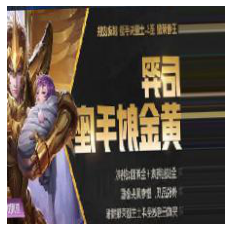

In [35]:
import matplotlib.pyplot as plt

def show_image(img_tensor):
    print(f'img_tensor:{img_tensor[0][0]}')
    show_tensor = img_tensor/255.
    print(f'show_tensor:{show_tensor[0][0]}')
    plt.imshow(show_tensor)
    plt.axis('off')
    plt.show()
    
show_image(img_tensor)

[matplotlib](https://matplotlib.org) 是 Python 编程语言及其数值数学扩展包 NumPy 的可视化操作界面。`pyplot` 是 `matplotlib` 的一个模块，它提供了一个类似 `MATLAB` 的接口。

[imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) 方法支持

- （M，N）：具有标量数据的图像。使用归一化和颜色图将这些值映射到颜色。
- （M，N，3）：具有RGB值（**0-1浮点**或**0-255整数**）的图像。
- （M，N，4）：具有RGBA值（**0-1浮点**或**0-255整数**）的图像，即包括**透明度**。

由于 `img_to_array` 返回值默认为 `float32`，所以无法直接使用 `imshow` 显示。因此，这里直接使用 `img_tensor/255.` 为图像数据做[归一化](https://xiaozhuanlan.com/topic/7218930564#%E5%BD%92%E4%B8%80%E5%8C%96)。

## 加载数据集

In [36]:
import tensorflow as tf

data_dir = f"./Glory of Kings/train"
batch_size = 9
img_height = 224
img_width = 224
validation_split=0.2

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

print(train_ds)

Found 3607 files belonging to 3 classes.
Using 2886 files for training.
Found 3607 files belonging to 3 classes.
Using 721 files for validation.
['houyi', 'kai', 'wangzhaojun']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


[tf.keras.preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing) 提供了 [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)方法，便于我们从目录中加载数据集。

参数解析：
- validation_split：[机器学习数据集](https://xiaozhuanlan.com/topic/9785360214)提过**数据集一般分为训练集、验证集、测试集**，而训练的时候需要训练集和验证集。validation_split 的意思是将 `data_dir` 目录的所有图片的**百分之多少划分为验证集**。这里设置为 0.2 表示，20% 为验证集，80% 为训练集。
- subset：可取值为 `"training"` 或者 `"validation"` 分别表示训练集和验证集。
- seed：可选随机种子
- batch_size：批量数据的大小。默认值：32

`image_dataset_from_directory` 返回值是 [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)，是一个包含**图像和标签数据的元组** `(images, labels)`，其 `images` 的形状为 `(batch_size, image_size[0], image_size[1], num_channels)`。

## 显示数据集

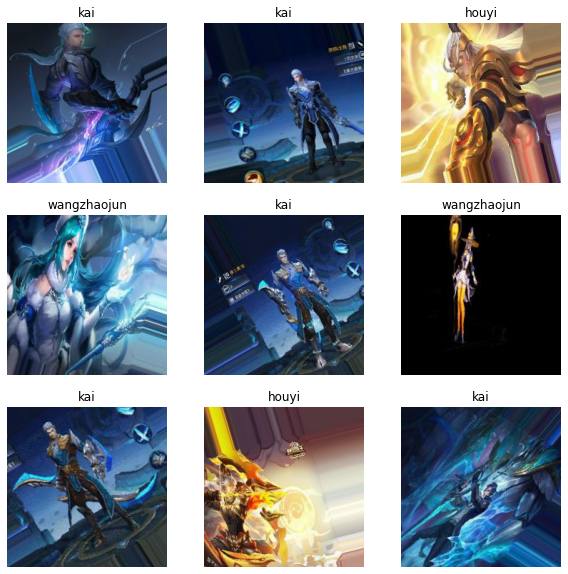

In [37]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(10, 10))
cols = 3
for images, labels in train_ds.take(1):
  rows = math.ceil(len(images)/cols)
  for i in range(len(images)):
    plt.subplot(rows, cols, i + 1)
    show_tensor = images[i].numpy()/255.
    plt.imshow(show_tensor)
    plt.title(class_names[labels[i]])
    plt.axis("off")

`tf.data.Dataset` 提供了 [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) 方法来按 `batch_size` 分批取数据。这里的 `count` 设置为 `1` 表示取 1 次批量（`batch_size`）大小的数据，`batch_size` 为 `9` 所以，取出了 `9` 张图片。

[plt.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) 的作用是把一个绘图区域（可以理解成画布）分成多个小区域，用来绘制多个子图。

## 数据输入管道

In [41]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds_count = len(np.concatenate([i for x, i in train_ds], axis=0))
print(train_ds_count)

train_ds = train_ds.cache().shuffle(train_ds_count).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

2886
